<a href="https://colab.research.google.com/github/oshan35/EC7212_EG_2020_4097-_Takehome_02/blob/main/EG_2020_4097.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless matplotlib numpy scikit-image --quiet

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

## Creating Sythatic Image

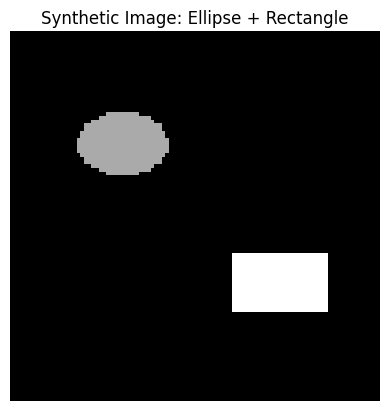

In [ ]:
def create_synthetic_image():
    img = np.zeros((100, 100), dtype=np.uint8)

    center_coordinates = (30, 30)
    axes_lengths = (12, 8)
    angle = 0
    start_angle = 0
    end_angle = 360
    cv2.ellipse(img, center_coordinates, axes_lengths, angle, start_angle, end_angle, 100, -1)

    top_left = (60, 60)
    bottom_right = (85, 75)
    cv2.rectangle(img, top_left, bottom_right, 150, -1)

    return img

base_image = create_synthetic_image()
plt.imshow(base_image, cmap='gray')
plt.title("Synthetic Image: Ellipse + Rectangle")
plt.axis("off")
plt.show()


## Adding gaussian noise to the image

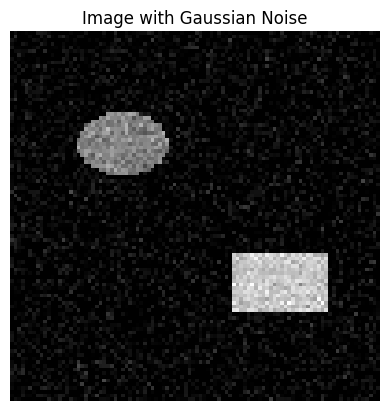

In [ ]:
def apply_gaussian_noise(img, stddev=15):
    noise = np.random.normal(0, stddev, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

noisy_img = apply_gaussian_noise(base_image)

plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')
plt.show()


## Segment Using Otsu’s Thresholding

Otsu's threshold value: 66


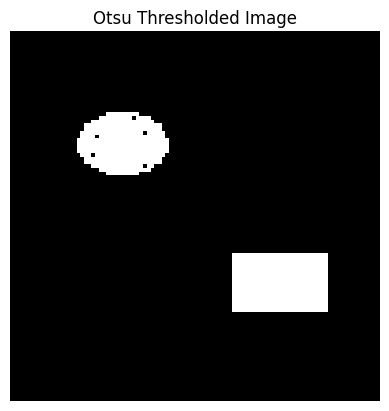

In [ ]:
def apply_otsu(img):
    thresh_value = threshold_otsu(img)
    binary = img > thresh_value
    return binary.astype(np.uint8) * 255, thresh_value

otsu_image, threshold_val = apply_otsu(noisy_img)
print(f"Otsu's threshold value: {threshold_val}")
plt.imshow(otsu_image, cmap='gray')
plt.title("Otsu Thresholded Image")
plt.axis("off")
plt.show()

## Region Growing Algorithm Implementation

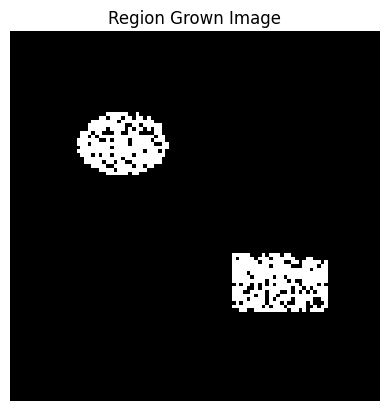

In [ ]:
def region_growing(img, seeds, threshold=10):
    visited = np.zeros_like(img, dtype=bool)
    region = np.zeros_like(img, dtype=np.uint8)

    height, width = img.shape
    directions = [(-1,0),(1,0),(0,-1),(0,1)]

    for seed in seeds:
        x, y = seed
        seed_val = img[x, y]
        stack = [(x, y)]

        while stack:
            i, j = stack.pop()
            if visited[i, j]:
                continue

            visited[i, j] = True
            region[i, j] = 255

            for dx, dy in directions:
                ni, nj = i + dx, j + dy
                if 0 <= ni < height and 0 <= nj < width and not visited[ni, nj]:
                    if abs(int(img[ni, nj]) - int(seed_val)) <= threshold:
                        stack.append((ni, nj))

    return region

seeds = [(30, 30), (70, 70)]
region_image = region_growing(noisy_img, seeds, threshold=20)
plt.imshow(region_image, cmap='gray')
plt.title("Region Grown Image")
plt.axis("off")
plt.show()